# <b>COMPLEX COMPUTING PROBLEM 1.0</b><hr>
NAME: MUHAMMAD WAQAS ALI<br>ROLL# 23F-BSAI-59<br>COURSE: MACHINE LEARNING (2+1)<br>INSTRUCTOR: ENGR. HAMZA FAROOQUI
# Multi-Model Ensemble for Noisy Data Classification<hr>
#### Learning Objective:
-   To enable students to handle real-world noisy data by designing, training, and comparing multiple machine learning models, and applying ensemble learning techniques to improve accuracy. 
<hr>

## <b>EXPLORATORY DATA ANALYSIS (EDA)</b>

#### LIBRARY INSTALLATION

In [ ]:
# Necessary Libraries Installation
import pandas               as pd
import numpy                as np
import matplotlib.pyplot    as plt
import seaborn              as sns
from sklearn.preprocessing      import StandardScaler
from sklearn.model_selection    import train_test_split
from sklearn.tree               import DecisionTreeClassifier
from sklearn.naive_bayes        import GaussianNB
from sklearn.svm                import SVC
from sklearn.model_selection    import cross_val_score
from sklearn.ensemble           import BaggingClassifier
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score

#### DATASET PREVIEW

In [ ]:
# Loading Dataset
dataSet = pd.read_csv("The Titanic Dataset.csv")

# Exploring few beginning columns
dataSet.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# Display all column names to see what features are available in the dataset
dataSet.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
# Dimension of Dataset
rows, columns = dataSet.shape
print(f"Number of Rows: {rows}\nNumber of Columns: {columns}")

Number of Rows: 1309
Number of Columns: 14


In [ ]:
# Detailed info about dataset
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
# Summary statistics for numeric columns
dataSet.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


#### HANDLEING NULL FEATURES

In [ ]:
# Check for missing values in each column
# The result shows the number of null (NaN) values per column
dataSet.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
# Removing rows where 'fare' or 'embarked' columns have missing (NaN) values,
# because this column contains 1% or 1.5% missing rows.
dataSet = dataSet.dropna(subset=['fare', 'embarked'])

In [ ]:
# Dropping columns 'cabin', 'body', and 'boat', 'home.dest' from the dataset because of more than 60% rows are empty.
dataSet = dataSet.drop(columns=['cabin', 'body', 'boat', 'home.dest'], axis=1, errors='ignore')

In [ ]:
# Filling missing 'age' values with the median age of each group (grouped by 'sex' and 'pclass')
dataSet['age'] = dataSet.groupby(['sex', 'pclass'])['age'].transform(lambda x: x.fillna(x.median()))

In [12]:
# Drop high-cardinality, non-predictive columns (name, ticket)
dataSet = dataSet.drop(columns=['name', 'ticket'], errors='ignore')

In [13]:
dataSet.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

#### DATA VISUALIZATION

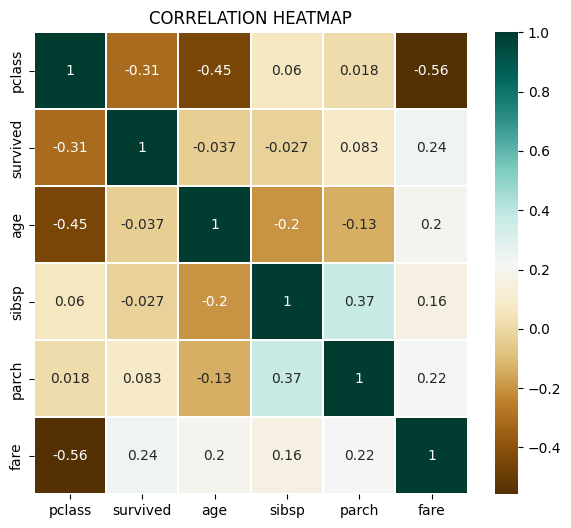

In [ ]:
# Analyze Correlations Between Numeric Features
numericColumns = ['pclass','survived','age','sibsp','parch','fare'] 
correlation = dataSet[numericColumns].corr() 
plt.figure(figsize=(7, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation, annot=True, cmap='BrBG', linewidths=0.2) 
plt.title('CORRELATION HEATMAP') 
plt.show()

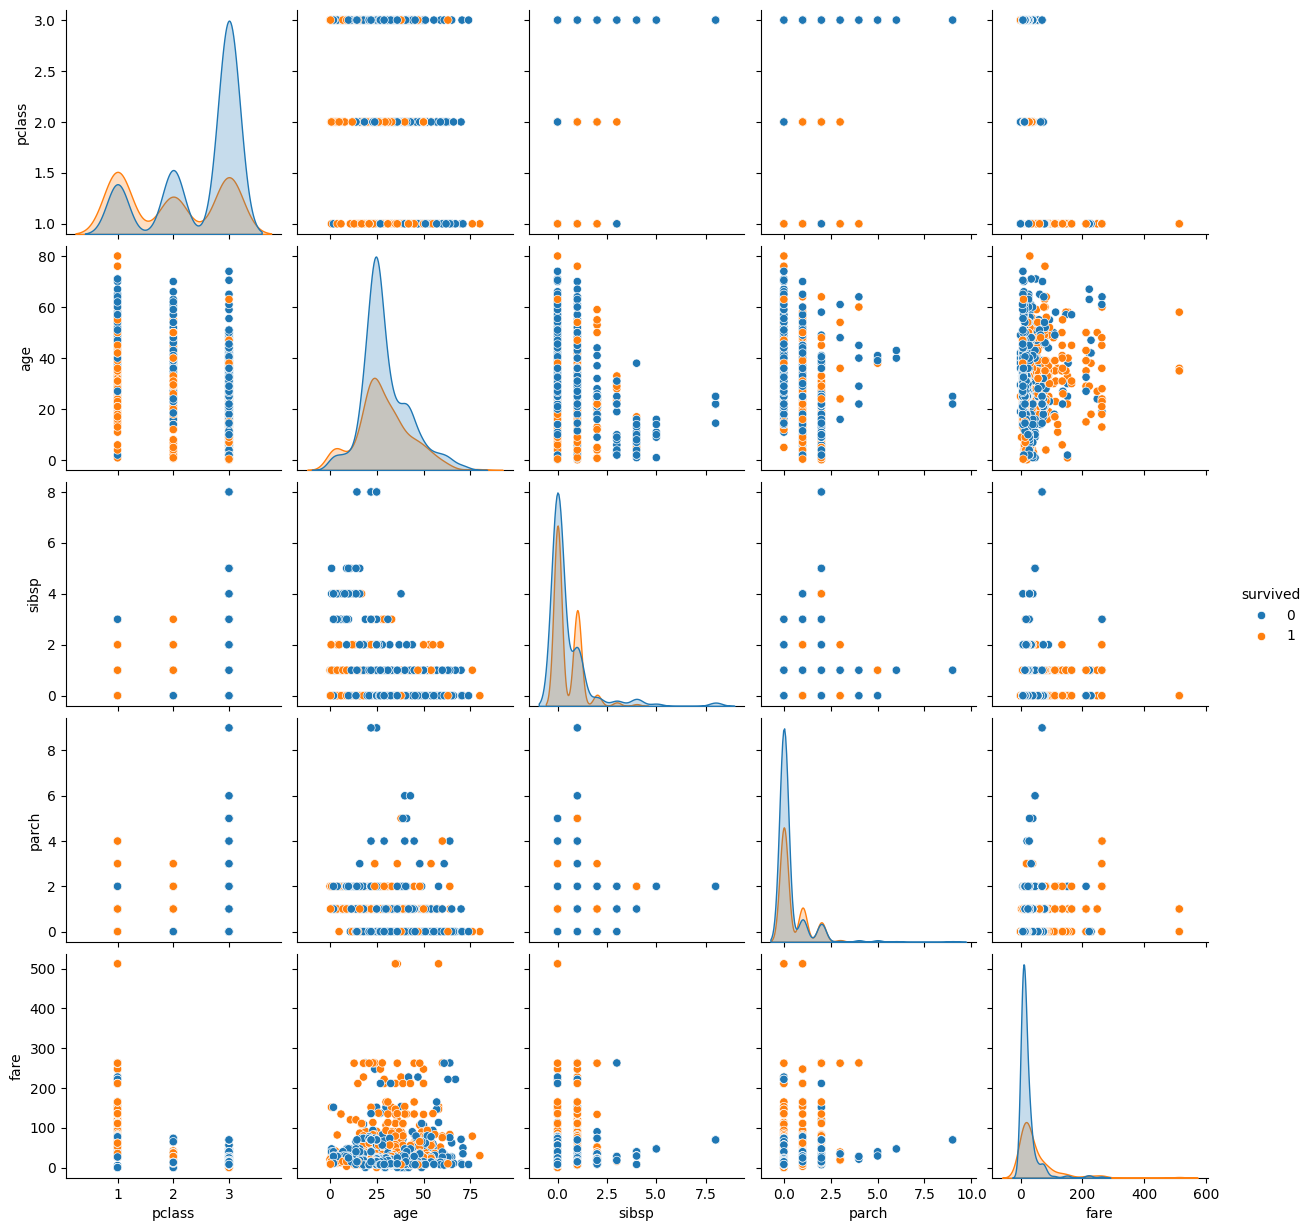

In [ ]:
# Visualize Pairwise Relationships Between Numeric Features
# Create a pairplot using seaborn
# This helps visually explore how features interact and whether patterns differ for survivors vs non-survivors
sns.pairplot(dataSet[numericColumns], hue='survived')
plt.show()

<Axes: xlabel='pclass', ylabel='count'>

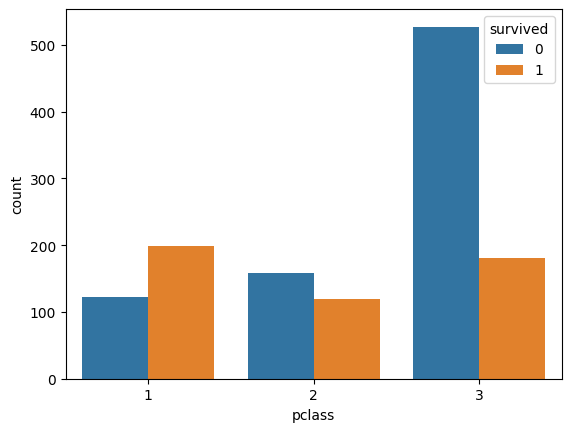

In [ ]:
# Compare Passenger Class vs Survival
# Create a count plot using seaborn
# This visualization helps us quickly see how survival rates differ across passenger classes.
sns.countplot(x='pclass', hue='survived', data=dataSet)
plt.show()

<Axes: xlabel='sex', ylabel='count'>

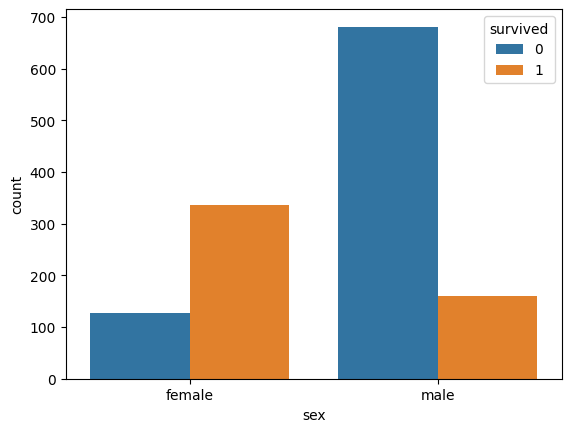

In [ ]:
# Compare Passenger Gender vs Survival
# Create a count plot using seaborn
# This visualization helps understand how survival rates differed between males and females
sns.countplot(x='sex', hue='survived', data=dataSet)
plt.show()

#### FEATURE ENCODING

In [ ]:
# Convert 'sex' and 'embarked' into numerical columns using One-Hot Encoding
# I can't set drop_first=True. 
# Reason: There are only 2 or 3 category of data points is present.
# If i remove that column, ultimately I loss one category out of only 2.

dataSet = pd.get_dummies(dataSet, columns=['sex', 'embarked'], drop_first=False)
dataSet.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.00,0,0,211.3375,True,False,False,False,True
1,1,1,0.92,1,2,151.5500,False,True,False,False,True
2,1,0,2.00,1,2,151.5500,True,False,False,False,True
3,1,0,30.00,1,2,151.5500,False,True,False,False,True
4,1,0,25.00,1,2,151.5500,True,False,False,False,True


In [ ]:
# Ensure One-Hot Encoded Columns Are Integers
dataSet['sex_female'] = dataSet['sex_female'].astype(int)
dataSet['sex_male'] = dataSet['sex_male'].astype(int)
dataSet['embarked_C'] = dataSet['embarked_C'].astype(int)
dataSet['embarked_Q'] = dataSet['embarked_Q'].astype(int)
dataSet['embarked_S'] = dataSet['embarked_S'].astype(int)

#### FEATURE SCALING/STANDARDIZATION

In [ ]:
# Feature Scaling for Numerical Columns
# StandardScaler standardizes features by removing the mean and scaling to unit variance
st = StandardScaler()
columns_to_scale = ['age', 'fare']

# Fit the scaler on the selected columns and transform them
# This replaces the original values with scaled values
dataSet[columns_to_scale] = st.fit_transform(dataSet[columns_to_scale])

dataSet.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,-0.014989,0,0,3.442063,1,0,0,0,1
1,1,1,-2.148302,1,2,2.286663,0,1,0,0,1
2,1,0,-2.066251,1,2,2.286663,1,0,0,0,1
3,1,0,0.060983,1,2,2.286663,0,1,0,0,1
4,1,0,-0.318880,1,2,2.286663,1,0,0,0,1


#### FEATURE-TARGET SPLIT

In [ ]:
# In supervised learning, we need to separate:
# - Features (X): the input variables used for prediction
# - Target (y): the output variable we want to predict
x = dataSet.drop('survived', axis=1)
y = dataSet['survived']

## <b>MODEL DEVELOPMENT & PERFORMANCE EVALUATION</b>

#### TRAIN-TEST SPLIT

In [ ]:
# Split Dataset into Training and Testing Sets

# To evaluate our ML model properly, we split the dataset into:
# - Training set: used to train the model
# - Testing set: used to evaluate how well the model generalizes to new, unseen data

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
# Verify the Shape of Training and Testing Data
print(f"Training Data Shape: {x_train.shape}\nTest Data Shape: {x_test.shape}\nTraining Label Shape: {y_train.shape}\nTest Label Shape: {y_test.shape}")

Training Data Shape: (1044, 10)
Test Data Shape: (262, 10)
Training Label Shape: (1044,)
Test Label Shape: (262,)


#### INITIALIZING ML MODELS

In [ ]:
# 1: Decision Tree Classifier
# - Works by creating decision rules based on feature values
dt = DecisionTreeClassifier(random_state=42)

# 2: Naïve Bayes Classifier
# - Based on Bayes' Theorem
# - Very fast and effective for probabilistic classification
nb = GaussianNB()

# 3: Support Vector Machine (SVM)
# - Uses hyperplanes to separate classes
# - RBF kernel is used to handle non-linear data
svm = SVC(kernel='rbf', random_state=42)

# Storing all models in a dictionary
# This allows easy iteration during training and evaluation
models = {
    "Decision Tree": dt,
    "Naïve Bayes": nb,
    "SVM": svm
}

#### TRAINING MODELS USING CROSS-VALIDATION

In [ ]:
# Dictionary to store cross-validation results of each model
cv_results = {}

# Loop through each model stored in the dictionary
for name, model in models.items():
    # 5-fold cross validation accuracy
    # - Dataset is divided into 5 equal parts (folds)
    # - Model is trained on 4 folds and tested on 1 fold
    # - This process repeats 5 times for reliable evaluation
    # - Accuracy is used as the performance metric
    cv_score = cross_val_score(model, x, y, cv=5, scoring='accuracy')

    # Store accuracy scores of all folds for the current model
    cv_results[name] = cv_score
    
    # Display individual fold accuracies and average performance
    print(f"===== {name} =====")
    print(f"Cross-Validation Accuracy Scores: {cv_score}")
    print(f"Mean Accuracy: {cv_score.mean():.4f}\n")

===== Decision Tree =====
Cross-Validation Accuracy Scores: [0.47328244 0.74329502 0.61302682 0.70114943 0.64750958]
Mean Accuracy: 0.6357

===== Naïve Bayes =====
Cross-Validation Accuracy Scores: [0.49618321 0.85823755 0.79693487 0.72413793 0.65900383]
Mean Accuracy: 0.7069

===== SVM =====
Cross-Validation Accuracy Scores: [0.51526718 0.84291188 0.82375479 0.73180077 0.62835249]
Mean Accuracy: 0.7084



In [ ]:
# FIT MODELS ON TRAINING DATA
for name, model in models.items():
    model.fit(x_train, y_train)

In [43]:
from joblib import dump

dump(bagging_dt, "bagging_model.joblib")
print("Model saved successfully!")

Model saved successfully!


#### PERFORMANCE MATRIX BEFORE BAGGING

In [ ]:
# Evaluating Model Performance (Train vs Test Accuracy)

# Lists to store accuracy values of each model
# These will help in comparing performance later
train_accuracies = []
test_accuracies = []
model_names = []

# Loop through each trained model
for name, model in models.items():

    # Generate predictions on training data
    # This shows how well the model has learned from the data
    y_train_pred = model.predict(x_train)

    # Generate predictions on unseen test data
    # This evaluates the generalization ability of the model
    y_test_pred = model.predict(x_test)
    
    # Calculate accuracy scores
    # Accuracy = (Correct Predictions / Total Predictions)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Store accuracy results for later comparison and visualization
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    model_names.append(name)
    
    # Display model-wise performance
    print(f"\n{name}")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:     {test_acc:.4f}")



Decision Tree
Training Accuracy: 0.9703
Test Accuracy:     0.7481

Naïve Bayes
Training Accuracy: 0.7816
Test Accuracy:     0.7710

SVM
Training Accuracy: 0.8209
Test Accuracy:     0.7901


#### VISUAL COMPARISON OF TRAINING V/S TEST ACCURACY

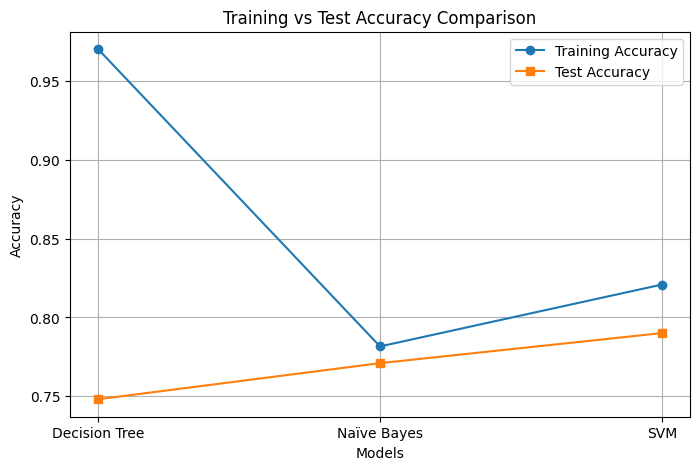

In [ ]:
plt.figure(figsize=(8,5))

# Plot training accuracy for each model
plt.plot(model_names, train_accuracies, marker='o', label='Training Accuracy')

# Plot test accuracy for each model
plt.plot(model_names, test_accuracies, marker='s', label='Test Accuracy')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()

#### BAGGING ENSAMBLE DECISION TREE


===== Decision Tree =====
Accuracy:  0.7481
Precision: 0.6981
Recall:    0.6852
F1 Score:  0.6916


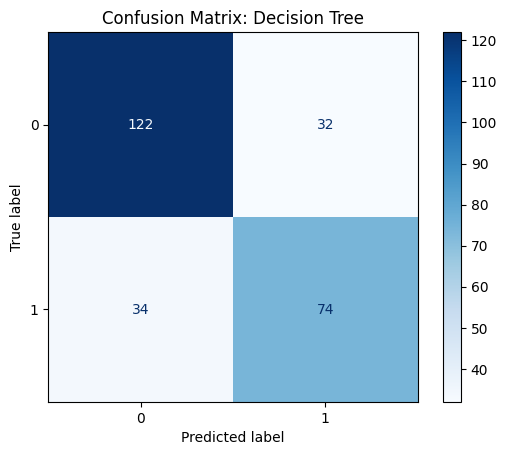


===== Naïve Bayes =====
Accuracy:  0.7710
Precision: 0.7182
Recall:    0.7315
F1 Score:  0.7248


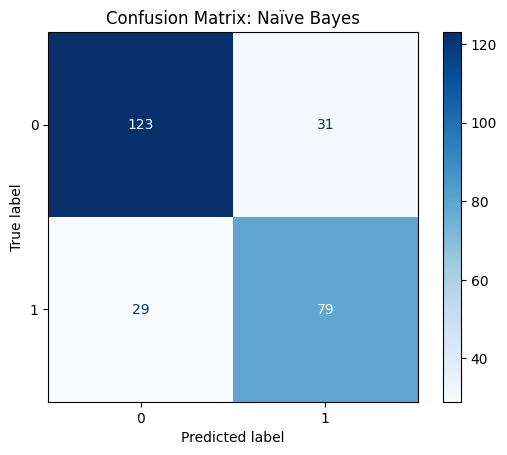


===== SVM =====
Accuracy:  0.7901
Precision: 0.7677
Recall:    0.7037
F1 Score:  0.7343


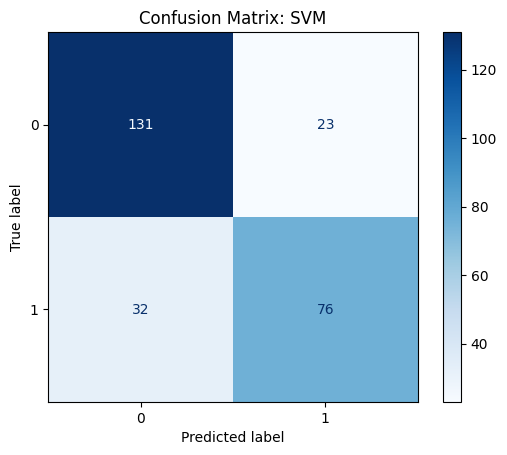


===== Bagging Decision Tree =====
Accuracy:  0.7863
Precision: 0.7549
Recall:    0.7130
F1 Score:  0.7333


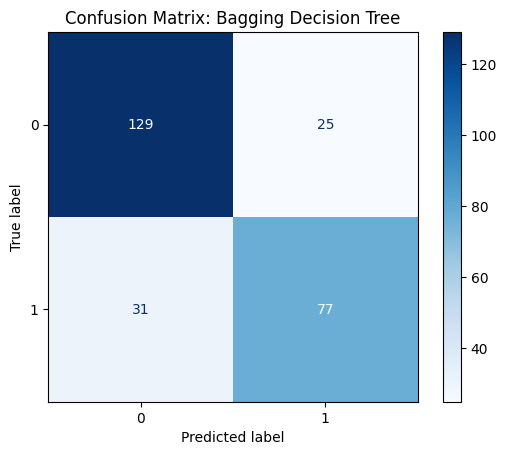

In [ ]:
# Bagging (Bootstrap Aggregating) is an ensemble technique
# It trains multiple models on different random subsets of the training data
# and combines their predictions to reduce overfitting and variance

bagging_dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),  # Base learner (weak model)
    n_estimators=50,        # Number of Decision Trees in the ensemble
    max_samples=0.8,        # Each model is trained on 80% of training data
    random_state=42         # Ensures reproducible results
)

# Train the Bagging model on training data
bagging_dt.fit(x_train, y_train)

# Predict survival on unseen test data using Bagging Ensemble
y_pred_bag = bagging_dt.predict(x_test)

# ===== 2) PERFORMANCE METRICS =====
# This function calculates and prints multiple evaluation metrics
# It also displays a confusion matrix for better performance understanding

def print_metrics(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\n===== {model_name} =====")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    
    # Generate Confusion Matrix
    # It shows True Positives, True Negatives, False Positives, and False Negatives
    cm = confusion_matrix(y_true, y_pred)
    
    # Visualize Confusion Matrix for better interpretability
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Evaluate base individual model (Decision Tree, Naïve Bayes, SVM)
for name, model in models.items():
    y_pred = model.predict(x_test)
    print_metrics(name, y_test, y_pred)

# Evaluate performance of Bagging Decision Tree
print_metrics("Bagging Decision Tree", y_test, y_pred_bag)
